In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Part 1


In [2]:
dataset = pd.read_csv('data10.csv')

In [3]:

dataset.head()

,x,y
0,0.0,3.638739
1,0.1,-3.133920
2,0.2,1.175217
3,0.3,3.958919
4,0.4,9.229480


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       230 non-null    float64
 1   y       230 non-null    float64
dtypes: float64(2)
memory usage: 3.7 KB


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
x,230.0,11.450000,6.653946,0.00000,5.725000,11.450000,17.175000,22.900000
y,230.0,25.852397,13.726889,-3.13392,13.701272,26.221472,36.755471,51.926774


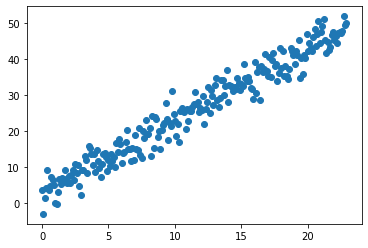

In [6]:
 plt.scatter(dataset.x, dataset.y)

In [7]:
def h(x,w,b):
    return x*w + b

In [8]:
def emp_err(X,Y,w,b):
    n=len(X)
    Ls=0
    for i in range(n):
        Ls+=pow(h(X[i],w,b)-Y[i],2)
    Ls=Ls/float(n)
    return Ls

In [9]:
def gradient(X,Y,w,b):
    dw=0
    db=0
    n=len(X)
    for i in range(n):
        dw+=(h(X[i],w,b)-Y[i])*X[i]    
        db+=(h(X[i],w,b)-Y[i])
    dw=2*dw/n
    db=2*db/n
    return dw,db

In [10]:
def armijo(X,Y,w,b):
    beta=0.1
    eps=1
    dw,db=gradient(X,Y,w,b)
    while(emp_err(X,Y,w-eps*dw,b-eps*db)>emp_err(X,Y,w,b)-(eps/2)*(db**2 + dw**2)):
        eps=eps*beta
    return eps
    

In [11]:
import random
def gradient_descent(X,Y,alpha,n_iter):
    w=random.random()
    b=random.random()
    n=float(len(X))
    loss=[]
    loss.append(emp_err(X,Y,w,b))
    print("error before : " ,emp_err(X,Y,w,b))
    
    if alpha==0:
        for i in range(n_iter):
            dw,db = gradient(X,Y,w,b)
            alpha=armijo(X,Y,w,b)
            b = b - alpha * db
            w = w - alpha * dw
            
            loss.append(emp_err(X,Y,w,b))
    else:
        for i in range(n_iter):
            dw,db = gradient(X,Y,w,b)
        
            b = b - alpha * db
            w = w - alpha * dw
        
            loss.append(emp_err(X,Y,w,b))
    print("error after : " ,emp_err(X,Y,w,b))

    return w,b,loss,alpha

In [12]:
dataset.x= [(x - np.mean(dataset.x))/(np.std(dataset.x)) for x in dataset.x]
dataset.y= [(y - np.mean(dataset.y))/(np.std(dataset.y)) for y in dataset.y]
#split data into train and test
datatrain=dataset.sample(frac=0.70,random_state=1234)
datatest=dataset.drop(datatrain.index)
X_train=np.array(datatrain.x)
X_test=np.array(datatest.x)
Y_train=np.array(datatrain.y)
Y_test=np.array(datatest.y)

error before :  0.23802149402482542
error after :  0.04895225598397901


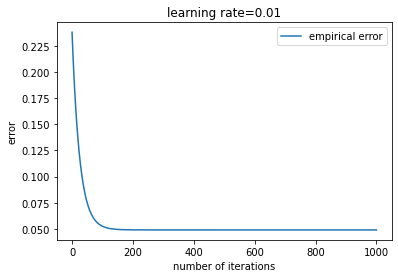

In [13]:
w,b,loss,alpha=gradient_descent(X_train,Y_train,0.01,1000)
w,b
fig, l = plt.subplots()
l.plot(loss,label="empirical error")
l.set_xlabel("number of iterations")
l.set_ylabel("error")
if (alpha in [0.01,0.02,0.03]):
    leg="learning rate=" + str(alpha)
else:
    leg="armijo's rule"
l.legend(loc=0)
l.set_title(leg)
fig.savefig(f'{leg}_accuracy.png')

error before :  0.8298076498953809
error after :  0.048952255983978996


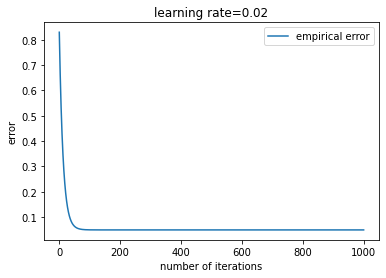

In [14]:
w,b,loss,alpha=gradient_descent(X_train,Y_train,0.02,1000)
w,b
fig, l = plt.subplots()
l.plot(loss,label="empirical error")
l.set_xlabel("number of iterations")
l.set_ylabel("error")
if (alpha in [0.01,0.02,0.03]):
    leg="learning rate=" + str(alpha)
else:
    leg="armijo's rule"
l.legend(loc=0)
l.set_title(leg)
fig.savefig(f'{leg}_accuracy.png')

error before :  1.0441154176311291
error after :  0.04895225598397899


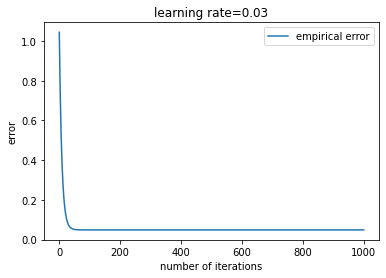

In [15]:
w,b,loss,alpha=gradient_descent(X_train,Y_train,0.03,1000)
w,b
fig, l = plt.subplots()
l.plot(loss,label="empirical error")
l.set_xlabel("number of iterations")
l.set_ylabel("error")
if (alpha in [0.01,0.02,0.03]):
    leg="learning rate=" + str(alpha)
else:
    leg="armijo's rule"
l.legend(loc=0)
l.set_title(leg)
fig.savefig(f'{leg}_accuracy.png')

error before :  0.8397100092754053
error after :  0.04895225598397907


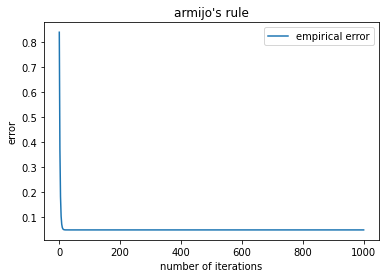

In [16]:
w,b,loss,alpha=gradient_descent(X_train,Y_train,0,1000)
w,b
fig, l = plt.subplots()
l.plot(loss,label="empirical error")
l.set_xlabel("number of iterations")
l.set_ylabel("error")
if (alpha in [0.01,0.02,0.03]):
    leg="learning rate=" + str(alpha)
else:
    leg="armijo's rule"
l.legend(loc=0)
l.set_title(leg)
fig.savefig(f'{leg}_accuracy.png')

Text(0, 0.5, 'Y')

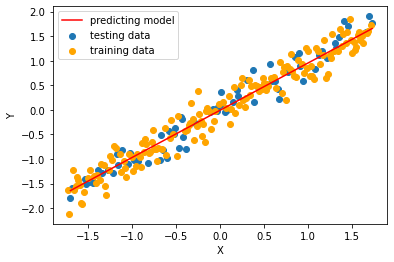

In [17]:
plt.scatter(X_test, Y_test,label='testing data ')

plt.plot(X_test,h(X_test,w,b),  color='red',label='predicting model')

plt.scatter(X_train, Y_train,color='orange',label='training data ')
plt.legend(loc=0)
plt.xlabel("X")
plt.ylabel("Y")

In [18]:
def predict(X,w,b):
    Y_pred=[]
    for i in range(len(X)):
        Y_pred.append(h(X[i],w,b))
    return Y_pred

In [19]:
Y_pred=predict(X_test,w,b)

In [20]:
def gen_error(X,Y,w,b):
    n=len(X)
    Ls=0
    for i in range(n):
        Ls+=pow(h(X[i],w,b)-Y[i],2)
    Ls=Ls/float(n)
    return Ls


In [21]:
gen_error(X_test,Y_test,w,b)

0.0415188133081238

In [22]:
y_bar=(1/Y_test.shape[0])*np.sum(Y_test)
t1 = np.sum(pow(Y_pred - Y_test,2))
t2 = (np.sum(pow(Y_test-y_bar,2)))
acc = 1-(t1/t2)

In [23]:
print("accuracy : " , acc)

accuracy :  0.9584335857869655


# part 2


In [24]:
data = pd.read_csv('data2.csv')

In [25]:
data.head()

,x,y
0,0.0,2137.883328
1,0.1,913.025002
2,0.2,-1055.282076
3,0.3,5462.955629
4,0.4,-2704.467669


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       240 non-null    float64
 1   y       240 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x,240.0,11.950000,6.942622,0.000000,5.975000,11.950000,17.925000,23.900000
y,240.0,3826.370144,4687.055597,-5774.231262,268.910441,3123.561976,6822.938649,19580.343309


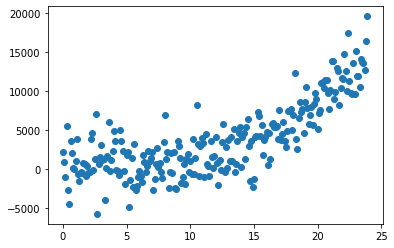

In [28]:
 plt.scatter(data.x, data.y)

In [29]:
def h_pol(x,W,b,k):
    f = b
    for i in range(k):
       f += W[i]*(x**(i+1))
    return f 

In [30]:
def emp_err_pol(X,Y,w,b,k):
    n=len(X)
    Ls=0
    for i in range(n):
        Ls+=pow(h_pol(X[i],w,b,k)-Y[i],2)
    Ls=Ls/float(n)
    return Ls

In [31]:
def gradient_pol(X,Y,w,b,k):
    dw=np.zeros((k,1))
    db=0
    n=len(X)
    for i in range(n):
        for j in range(k):
            dw[j]+=(X[i]**(j+1))*(h_pol(X[i],w,b,k)-Y[i])
        db += h_pol(X[i],w,b,k) - Y[i]
    dw=[2*x/float(n) for x in dw]
    db=2*db/float(n)
    return np.array(dw),db[0]

In [32]:
import random
def gradient_descent_pol(X,Y,alpha,n_iter,k):
    w= np.random.rand(k, 1)
    b=0
    loss=[]
    loss.append(emp_err_pol(X,Y,w,b,k))
    print("empirical error before : " ,emp_err_pol(X,Y,w,b,k))
    for i in range(n_iter):
        dw,db = gradient_pol(X,Y,w,b,k)
        for j in range(k):    
            w[j] = w[j] - alpha * dw[j]
        b = b - alpha * db
        loss.append(emp_err_pol(X,Y,w,b,k))
        
    print("empirical error after : " ,emp_err_pol(X,Y,w,b,k))

    return w,b,loss

In [33]:
data.x= [(x - np.mean(data.x))/(np.std(data.x)) for x in data.x]
data.y= [(y - np.mean(data.y))/(np.std(data.y)) for y in data.y]
#splitting data
datatrain=data.sample(frac=0.70,random_state=16)
datatest=data.drop(datatrain.index)
X_train=np.array(datatrain.x)
X_test=np.array(datatest.x)
Y_train=np.array(datatrain.y)
Y_test=np.array(datatest.y)

empirical error before :  [1.2407778]
empirical error after :  [0.26792319]


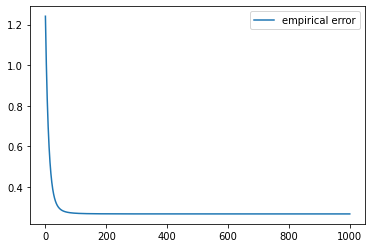

In [34]:
w,b,loss=gradient_descent_pol(X_train,Y_train,0.01,1000,2)
w,b
plt.plot(loss,label='empirical error')
plt.legend(loc=0)

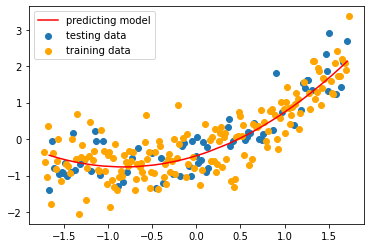

In [35]:
plt.scatter(X_test, Y_test,label='testing data ')

plt.plot(X_test,h_pol(X_test,w,b,2),  color='red',label='predicting model')

plt.scatter(X_train, Y_train,color='orange',label='training data ')
plt.legend(loc=0)

In [36]:
def predict_pol(X,w,b,k):
    Y_pred=[]
    for i in range( len(X)):
        Y_pred.append(h_pol(X[i],w,b,k))
    return Y_pred

In [37]:
Y_pred=predict_pol(X_test,w,b,2)

In [38]:
def gen_error_pol(X,Y,w,b,k):
    n=len(X)
    Ls=0
    for i in range(n):
        Ls+=pow(h_pol(X[i],w,b,k)-Y[i],2)
    Ls=Ls/float(n)
    return Ls

In [39]:
Y_pred

[array([-0.44400798]),
 array([-0.46556252]),
 array([-0.48636564]),
 array([-0.52571763]),
 array([-0.54426651]),
 array([-0.55325917]),
 array([-0.56206397]),
 array([-0.57911002]),
 array([-0.60327018]),
 array([-0.61843769]),
 array([-0.62573967]),
 array([-0.65306903]),
 array([-0.67159358]),
 array([-0.70357065]),
 array([-0.71702316]),
 array([-0.72113162]),
 array([-0.73232988]),
 array([-0.73885612]),
 array([-0.76223385]),
 array([-0.76401511]),
 array([-0.76337859]),
 array([-0.75989995]),
 array([-0.75132493]),
 array([-0.71592878]),
 array([-0.70233036]),
 array([-0.68156917]),
 array([-0.67590924]),
 array([-0.62386707]),
 array([-0.57694559]),
 array([-0.56846785]),
 array([-0.55094882]),
 array([-0.51365651]),
 array([-0.5038638]),
 array([-0.49388324]),
 array([-0.46281442]),
 array([-0.45208244]),
 array([-0.44116261]),
 array([-0.41875938]),
 array([-0.39560474]),
 array([-0.37169868]),
 array([-0.35946387]),
 array([-0.34704121]),
 array([-0.13815882]),
 array([-0.1

In [40]:
print("generalization error : " ,gen_error_pol(X_test,Y_test,w,b,2)[0])

generalization error :  0.20801009639189852


# Part 3

In [41]:
data3 = pd.read_csv('data2.csv')

In [42]:
import math 
def sigmoid(x,w,b):
    return 1.0/(1+np.exp(-(x*w + b)))

In [43]:
def err(X,Y,w,b):
    n=len(X)
    Ls=0
    for i in range(n):
        Ls+=Y[i]*math.log(sigmoid(X[i],w,b))+(1-Y[i])*math.log(1-sigmoid(X[i],w,b))
    Ls=-Ls/float(n)
    return Ls

In [44]:
def gradient_log(X,Y,w,b):
    dw=0
    db=0
    n=len(X)
    for i in range(n):
        dw+=(sigmoid(X[i],w,b)-Y[i])*X[i]    
        db+=(sigmoid(X[i],w,b)-Y[i])
    dw=dw/float(n)
    db=db/float(n)
    return dw,db

In [45]:
import random
def gradient_descent_log(X,Y,alpha,n_iter):
    w=0
    b=0
    n=float(len(X))
    loss=[]
    loss.append(err(X,Y,w,b))
    print("error before : " ,err(X,Y,w,b))
    for i in range(n_iter):
        dw,db = gradient_log(X,Y,w,b)
        
        b = b - alpha * db
        w = w - alpha * dw
        loss.append(err(X,Y,w,b))
    print("error after : " ,err(X,Y,w,b))

    return w,b,loss

In [46]:
w,b,loss=gradient_descent_log(X_train,Y_train,0.01,10000)
w,b
plt.plot(loss)

error before :  0.6931471805599465


ValueError: math domain error

In [ ]:
plt.scatter(X_test, Y_test,label='testing data ')

plt.plot(X_test,sigmoid(X_test,w,b),  color='red',label='decision function')

plt.scatter(X_train, Y_train,color='orange',label='training data ')
plt.legend(loc=0)

In [ ]:
sigmoid(X_test,w,b)

In [ ]:
err(X_test,Y_test,w,b)